# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [10]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
from newsapi import NewsApiClient

%matplotlib inline
load_dotenv()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\asant\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [11]:
# Read your api key environment variable
api_key = os.getenv('news_api')

In [12]:
# Create a newsapi client

newsapi = NewsApiClient(api_key=api_key)

In [14]:
# Fetch the Bitcoin news articles
bitcoin_news = newsapi.get_everything(
    q="Bitcoin",
    language="en",
    page_size=100,
    sort_by="relevancy"
)


# Show the total number of news
bitcoin_news["totalResults"]

7303

In [15]:
# Fetch the Ethereum news articles
eth_news = newsapi.get_everything(
    q="Ethereum",
    language="en",
    page_size=100,
    sort_by="relevancy"
)


# Show the total number of news
eth_news["totalResults"]

2505

In [76]:
# Create the Bitcoin sentiment scores DataFrame
btc_sentiments = []

for article in bitcoin_news["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        btc_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
btc_df = pd.DataFrame(btc_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
btc_df = btc_df[cols]

btc_df.head()


,date,text,compound,positive,negative,neutral
0,2021-09-25,Bitcoin and similar blockchain-based cryptos e...,0.0000,0.000,0.000,1.000
1,2021-10-06,"<ul><li>Bitcoin, in terms of market value, ros...",0.3400,0.076,0.000,0.924
2,2021-10-06,How high are the chances of Bitcoin sustaining...,0.4939,0.219,0.000,0.781
3,2021-10-04,JPMorgan CEO Jamie Dimon is still not a Bitcoi...,-0.2411,0.000,0.116,0.884
4,2021-09-28,Elon Musk has performed a sudden U-turn on bit...,0.1901,0.091,0.043,0.866


In [17]:
# Create the Ethereum sentiment scores DataFrame
eth_sentiments = []

for article in eth_news["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        eth_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
eth_df = pd.DataFrame(eth_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
eth_df = eth_df[cols]

eth_df.head()


,date,text,compound,positive,negative,neutral
0,2021-10-16,A new cross-chain bridge is currently connecte...,0.0000,0.000,0.0,1.000
1,2021-09-24,Its the countrys latest crackdown on digital c...,0.0000,0.000,0.0,1.000
2,2021-10-14,Mark Cuban has some advice for people who are ...,0.0000,0.000,0.0,1.000
3,2021-09-25,"image source, foundation.app/@SideEyeingChloe\...",0.4215,0.101,0.0,0.899
4,2021-10-11,"An immersive art installation, which will be c...",0.0000,0.000,0.0,1.000


In [18]:
# Describe the Bitcoin Sentiment
btc_df.describe()

,compound,positive,negative,neutral
count,100.000000,100.000000,100.000000,100.000000
mean,0.111869,0.044060,0.017270,0.938670
std,0.310797,0.059994,0.044558,0.073016
min,-0.790600,0.000000,0.000000,0.659000
25%,0.000000,0.000000,0.000000,0.898500
50%,0.000000,0.000000,0.000000,0.951000
75%,0.345300,0.076250,0.000000,1.000000
max,0.855500,0.240000,0.280000,1.000000


In [19]:
# Describe the Ethereum Sentiment
eth_df.describe()

,compound,positive,negative,neutral
count,100.000000,100.000000,100.000000,100.00000
mean,0.132361,0.057690,0.026760,0.91556
std,0.353731,0.065345,0.046916,0.08012
min,-0.757900,0.000000,0.000000,0.71400
25%,0.000000,0.000000,0.000000,0.85800
50%,0.000000,0.055500,0.000000,0.92600
75%,0.426225,0.091250,0.044250,1.00000
max,0.840200,0.286000,0.210000,1.00000


### Questions:

Q: Which coin had the highest mean positive score?

A: ETH had the higher mean postive score

Q: Which coin had the highest compound score?

A: BTC had the highest compound score

Q. Which coin had the highest positive score?

A: ETH had a higher postive score

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [20]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [38]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords

sw = set(stopwords.words('english'))

# Expand the default stopwords list if necessary

In [173]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Remove the punctuation from text  # Convert the words to lowercase
    regex = re.compile("[^a-zA-Z ]")
    sw_addons = {'said','reuters', 'oct','getty', 'illustration', 'representation', 'exchangetraded', 'seen', 'first', 'sent', 'found', 'including', 'today', 'announced', 'week', 'basically', 'also', 'ha', 'char', 'us', 'taken'}
   
    # Create a tokenized list of the words
    re_clean = regex.sub('', text)
    words = word_tokenize(re_clean)
    
    # Lemmatize words into root words
    lem = [lemmatizer.lemmatize(word) for word in words]

    # Remove the stop words
    tokens = [word.lower() for word in lem if word.lower() not in sw.union(sw_addons)]
    
    return tokens

In [174]:
# Create a new tokens column for Bitcoin
btc_df["tokens"] =btc_df.text.apply(tokenizer)
btc_df.head()

,date,text,compound,positive,negative,neutral,tokens
0,2021-09-25,Bitcoin and similar blockchain-based cryptos e...,0.0000,0.000,0.000,1.000,"[bitcoin, similar, blockchainbased, cryptos, e..."
1,2021-10-06,"<ul><li>Bitcoin, in terms of market value, ros...",0.3400,0.076,0.000,0.924,"[ullibitcoin, term, market, value, rose, lilii..."
2,2021-10-06,How high are the chances of Bitcoin sustaining...,0.4939,0.219,0.000,0.781,"[high, chance, bitcoin, sustaining, gain, push..."
3,2021-10-04,JPMorgan CEO Jamie Dimon is still not a Bitcoi...,-0.2411,0.000,0.116,0.884,"[jpmorgan, ceo, jamie, dimon, still, bitcoin, ..."
4,2021-09-28,Elon Musk has performed a sudden U-turn on bit...,0.1901,0.091,0.043,0.866,"[elon, musk, performed, sudden, uturn, bitcoin..."


In [175]:
# Create a new tokens column for Ethereum
eth_df["tokens"] =eth_df.text.apply(tokenizer)
eth_df.head()

,date,text,compound,positive,negative,neutral,tokens
0,2021-10-16,A new cross-chain bridge is currently connecte...,0.0000,0.000,0.0,1.000,"[new, crosschain, bridge, currently, connected..."
1,2021-09-24,Its the countrys latest crackdown on digital c...,0.0000,0.000,0.0,1.000,"[country, latest, crackdown, digital, currenci..."
2,2021-10-14,Mark Cuban has some advice for people who are ...,0.0000,0.000,0.0,1.000,"[mark, cuban, advice, people, new, investing, ..."
3,2021-09-25,"image source, foundation.app/@SideEyeingChloe\...",0.4215,0.101,0.0,0.899,"[image, source, foundationappsideeyeingchloeim..."
4,2021-10-11,"An immersive art installation, which will be c...",0.0000,0.000,0.0,1.000,"[immersive, art, installation, converted, nfts..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [176]:
from collections import Counter
from nltk import ngrams

In [177]:
btc_text = btc_df.text
btc_string = ' '.join(btc_text)
btc_tokens = tokenizer(btc_string)

eth_text = eth_df.text
eth_string = ' '.join(eth_text)
eth_tokens = tokenizer(eth_string)


In [178]:
# Generate the Bitcoin N-grams where N=2
N=2
bigram_counts_btc = Counter(ngrams(btc_tokens, N))
print(dict(bigram_counts_btc))

{('bitcoin', 'similar'): 1, ('similar', 'blockchainbased'): 1, ('blockchainbased', 'cryptos'): 1, ('cryptos', 'exhibit'): 1, ('exhibit', 'radical'): 1, ('radical', 'divergence'): 1, ('divergence', 'traditional'): 1, ('traditional', 'scarcity'): 1, ('scarcity', 'economics'): 1, ('economics', 'saw'): 1, ('saw', 'mps'): 1, ('mps', 'napster'): 1, ('napster', 'cratered'): 1, ('cratered', 'physical'): 1, ('physical', 'album'): 1, ('album', 'sale'): 1, ('sale', 'turn'): 1, ('turn', 'ullibitcoin'): 1, ('ullibitcoin', 'term'): 1, ('term', 'market'): 1, ('market', 'value'): 1, ('value', 'rose'): 1, ('rose', 'liliit'): 1, ('liliit', 'passed'): 1, ('passed', 'mark'): 1, ('mark', 'time'): 1, ('time', 'four'): 1, ('four', 'tuesdaylilibitcoin'): 1, ('tuesdaylilibitcoin', 'fell'): 1, ('fell', 'early'): 1, ('early', 'septemberli'): 1, ('septemberli', 'high'): 1, ('high', 'chance'): 1, ('chance', 'bitcoin'): 1, ('bitcoin', 'sustaining'): 1, ('sustaining', 'gain'): 1, ('gain', 'pushing'): 1, ('pushing', 

In [179]:
# Generate the Ethereum N-grams where N=2
N=2
bigram_counts_eth = Counter(ngrams(eth_tokens, N))
print(dict(bigram_counts_eth))

{('new', 'crosschain'): 1, ('crosschain', 'bridge'): 2, ('bridge', 'currently'): 1, ('currently', 'connected'): 1, ('connected', 'ethereum'): 1, ('ethereum', 'crosschain'): 1, ('bridge', 'cardano'): 1, ('cardano', 'public'): 1, ('public', 'chain'): 1, ('chain', 'come'): 1, ('come', 'futurenervostoday'): 1, ('futurenervostoday', 'force'): 1, ('force', 'bridge'): 1, ('bridge', 'country'): 1, ('country', 'latest'): 1, ('latest', 'crackdown'): 1, ('crackdown', 'digital'): 2, ('digital', 'currenciesillustration'): 1, ('currenciesillustration', 'alex'): 1, ('alex', 'castro'): 1, ('castro', 'vergethe'): 1, ('vergethe', 'peoples'): 1, ('peoples', 'bank'): 4, ('bank', 'china'): 4, ('china', 'country'): 1, ('country', 'central'): 1, ('central', 'bank'): 5, ('bank', 'friday'): 2, ('friday', 'cryptocurrency'): 1, ('cryptocurrency', 'transaction'): 1, ('transaction', 'ar'): 1, ('ar', 'mark'): 1, ('mark', 'cuban'): 2, ('cuban', 'advice'): 1, ('advice', 'people'): 1, ('people', 'new'): 1, ('new', 'in

In [180]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [181]:
# Use token_count to get the top 10 words for Bitcoin
btc_common= token_count(btc_tokens, 10)
btc_common

[('bitcoin', 86),
 ('cryptocurrency', 25),
 ('fund', 19),
 ('new', 18),
 ('york', 12),
 ('etf', 11),
 ('company', 10),
 ('picture', 10),
 ('future', 10),
 ('ceo', 9)]

In [182]:
# Use token_count to get the top 10 words for Ethereum
eth_common= token_count(eth_tokens, 10)
eth_common

[('bitcoin', 29),
 ('cryptocurrency', 21),
 ('ethereum', 18),
 ('cryptocurrencies', 14),
 ('crypto', 14),
 ('world', 13),
 ('new', 12),
 ('bank', 11),
 ('exchange', 11),
 ('digital', 10)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [184]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

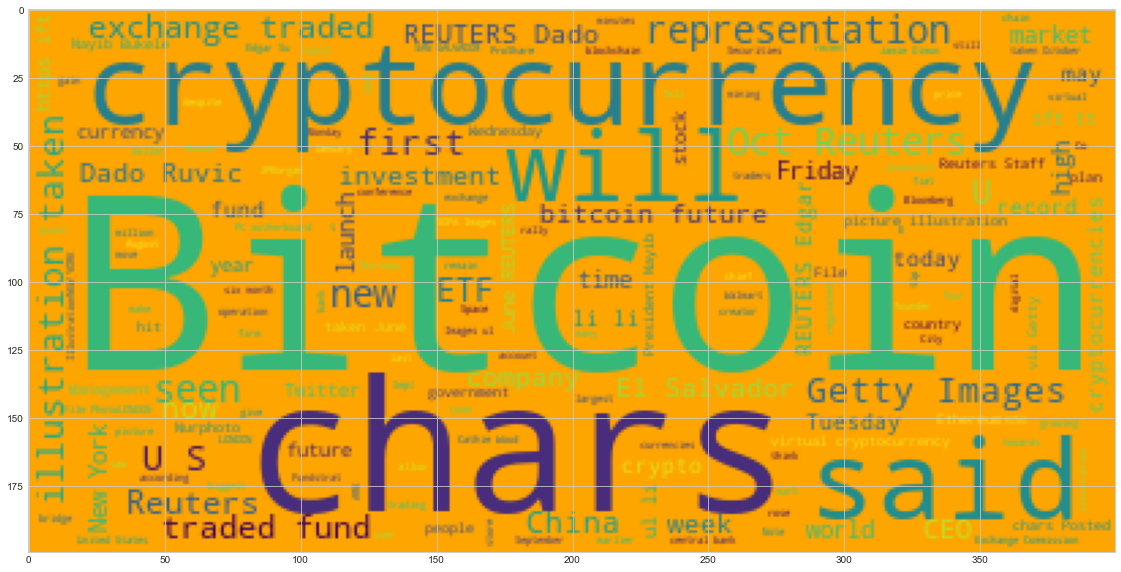

In [189]:
# Generate the Bitcoin word cloud
cloud_btc = WordCloud(background_color='orange').generate(btc_df.text.str.cat())
cloud_btc
plt.imshow(cloud_btc)

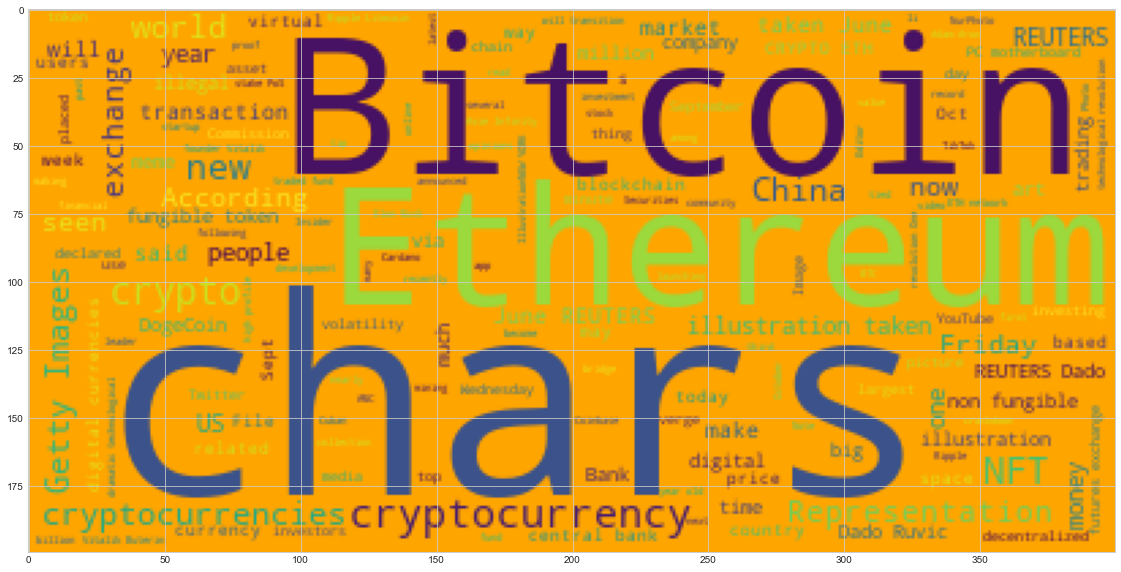

In [196]:
# Generate the Ethereum word cloud
cloud_eth = WordCloud(background_color='orange').generate(eth_df.text.str.cat())
cloud_eth
plt.imshow(cloud_eth)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [197]:
import spacy
from spacy import displacy

In [198]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [199]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [209]:
# Concatenate all of the Bitcoin text together
btc_doc = btc_df.text.str.cat()


In [213]:
# Run the NER processor on all of the text
btc_ner = nlp(btc_doc)

# Add a title to the document
btc_ner.user_data["Title"] = "Bitcoin NER"

In [214]:
# Render the visualization
displacy.render(btc_ner, style = 'ent')

In [223]:
# List all Entities
btc_ner.ents

(4.6%,
 53,859.6.</li><li,
 50,000,
 first,
 four weeks,
 Tuesday,
 50,000,
 Jamie Dimon,
 https://ift.tt/3iyi5nR,
 Musk,
 Tesla,
 $1.6 billion,
 Wednesday,
 a couple of minutes,
 Alex Castro,
 The Verge,
 The Peoples Bank of China,
 Friday,
 the Wall Street Journal,
 three,
 Journal,
 Th,
 electro,
 two decades,
 403 million,
 23 August,
 UK,
 four,
 SEC,
 two,
 IMF,
 Kristalina Georgieva,
 Elon Musk,
 Tuesday,
 U.S.,
 Canada,
 Bitcoin,
 Alberta,
 Link Global,
 June 29, 2021,
 REUTERS,
 Dado Ruvic/IllustrationHONG KONG,
 Oct 21,
 Reuters,
 October 19, 2021,
 REUTERS,
 Edgar SuLONDON,
 Oct 20,
 Reuters,
 16,
 Exchange Commission,
 Andrew Kelly,
 The US Securities and Exchange Commission,
 as many as four,
 October,
 October 18, 2021,
 REUTERS,
 Edgar SuSINGAPORE,
 Oct 19,
 Reuters,
 six-month,
 Reuters,
 Reuters,
 six-month,
 Tuesday,
 U.S.,
 October 19, 2021,
 REUTERS,
 Edgar SuHONG KONG,
 Oct 20,
 Reuters,
 Wednesday,
 first,
 U.S.,
 Conway G. Gittens,
 NurPhoto,
 Getty Images,
 firs

---

### Ethereum NER

In [216]:
# Concatenate all of the Ethereum text together
eth_doc = eth_df.text.str.cat()

In [217]:
# Run the NER processor on all of the text
eth_ner = nlp(eth_doc)

# Add a title to the document
eth_ner.user_data["Title"] = "Ethereum NER"

In [218]:
# Render the visualization
displacy.render(eth_ner, style = 'ent')

In [222]:
# List all Entities
eth_ner.ents

(Ethereum,
 Cardano,
 Nervos ,
 today,
 the Force Bridge,
 Alex Castro,
 The Verge,
 The Peoples Bank of China,
 Friday,
 Cuban,
 CNBC,
 Wednesday,
 captionChloe Clem's,
 two-year-old,
 Hong Kong,
 September 30, 2021,
 FTX,
 NFT,
 Robert Nickelsberg,
 Getty Images,
 Coinbase Global,
 NFT,
 the end of the year,
 US,
 Ethereum,
 NurPhoto,
 first,
 June 29, 2021,
 REUTERS,
 Dado Ruvic,
 Oct,
 Reuters,
 1,
 Reuters,
 9.46%,
 47,980.97,
 20:12 GMT,
 Friday,
 4,146.54,
 June 14, 2021,
 REUTERS,
 Edgar Su/IllustrationOct,
 Reuters,
 7.11%,
 55,162.92,
 20,
 November 19, 2020,
 REUTERS,
 Dado Ruvic/Illustration/File PhotoOct,
 Reuters,
 5,
 August 6, 2021,
 REUTERS,
 Dado Ruvic/Illustration/File,
 30,
 Reuters,
 5.23%,
 43,716.97,
 22,
 Ethereum,
 Friday,
 China,
 China,
 the People's Bank of …,
 Getty Images,
 the minute,
 Vitalik Buterin,
 One year from now,
 Ethereum,
 Th,
 Getty Images,
 the minute,
 June 29, 2021,
 REUTERS,
 Dado Ruvic/Illustration/File Photo,
 Ethereum,
 June 29, 2021,
 

---